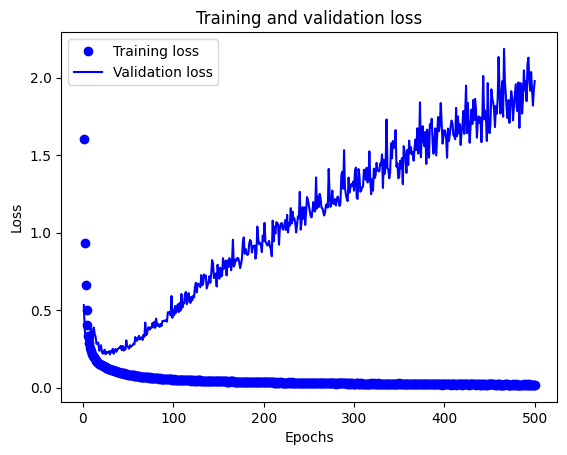

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data from the CSV file
housing_df = pd.read_csv('housing.csv', header=None, delimiter='\s+')

# Split the data into features (X) and target (y)
X = housing_df.iloc[:, :-1].values
y = housing_df.iloc[:, -1].values.reshape(-1, 1)

# Scale the data using StandardScaler (scale feature and target variable)
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_y = scaler.fit_transform(y)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[13]),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(0.001), metrics=['mae'])

# Train the model
history = model.fit(scaled_X, scaled_y, epochs=500, validation_split=0.2, verbose=0)


# Plot the training and validation loss over epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [4]:

# Evaluate the model
loss, mae = model.evaluate(scaled_X, scaled_y, verbose=0)
print("Mean absolute error:", mae)

# Predict housing prices using the model
predictions = model.predict(scaled_X)
predicted_prices = scaler.inverse_transform(predictions)

# Print predicted prices and actual prices
print("Predicted prices:", predicted_prices.flatten())
print("Actual prices:", y.flatten())

Mean absolute error: 0.3030287027359009
16/16 [==============================] - 1s 7ms/step
Predicted prices: [23.630281   22.644081   33.32039    34.01411    34.793495   27.442648
 22.152216   21.744345   16.427498   19.733967   20.195168   19.877026
 22.405458   20.07111    18.861374   20.156492   23.45501    18.238302
 19.789925   18.445293   13.382645   18.340677   16.171253   14.284957
 16.406385   13.069988   16.53321    15.1347065  18.331545   20.955265
 13.877496   16.653097   13.689085   14.213656   13.726529   20.526705
 21.31013    21.398115   24.375116   29.559555   35.06976    27.375725
 24.495266   25.230377   22.251726   19.992226   21.488867   19.189644
 15.378481   18.701775   20.162443   22.099766   26.396338   22.459335
 19.293854   34.383114   24.330988   30.625278   23.207165   20.716118
 18.186573   15.892347   23.769491   25.750069   33.028656   25.159492
 19.469412   21.992727   18.5612     20.906866   24.3839     21.506083
 23.079094   23.649115   24.493584   